# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных


В качестве набора данных мы будем использовать набор данных о пациентах с сахарным диабетом - 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

Для каждого из 442 пациентов с сахарным диабетом были собраны важные показатели здоровья, а также интересная реакция - количественная мера прогрессирования заболевания через год после исходного уровня.

Датасет состоит из одного файла - diabetes.tab.txt.

Файл с набором данных содержит следующие колонки:

- age - возраст в годах
- sex - пол
- bmi - индекс массы тела
- bp - среднее кровяное давление

Шесть измерений уровня сыворотки крови:
- s1 - (T-cells) тип белых кровяных телец
- s2 - липопротеины низкой плотности
- s3 - липопротеины высокой плотности
- s4 - ТТГ - тиреотропный гормон
- s5 - ламотригин
- s6 - уровень сахара в крови

### Импорт библиотек

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

Загрузим файл датасета в помощью библиотеки Pandas. Вызывая метод read_table укажем разделитель данных с помощью параметра sep. В файлах с расширением .txt зачастую разделителями являются пробелы и отступы ('\s+').

In [44]:
data = pd.read_table('/Users/kalashnikova/Documents/diabetes.tab.txt', sep = '\s+', engine='python')

In [45]:
# Датасет возвращается в виде словаря со следующими ключами
for x in data:
    print(x)

AGE
SEX
BMI
BP
S1
S2
S3
S4
S5
S6
Y


In [47]:
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


## 2) Основные характеристики датасета

In [48]:
# Размер датасета
data.shape

(442, 11)

In [55]:
# Количество строк в датасете
rows = data.shape[0]
print(f'Всего строк: {rows}')

Всего строк: 442


In [49]:
# Первые 5 строк датасета
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [50]:
# Список колонок
data.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [51]:
# Список колонок с типами данных
data.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [52]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

AGE - 0
SEX - 0
BMI - 0
BP - 0
S1 - 0
S2 - 0
S3 - 0
S4 - 0
S5 - 0
S6 - 0
Y - 0


In [53]:
# Основные статистические характеристки набора данных
data.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## 3) Визуальное исследование датасета

### Диаграмма рассеяния

<AxesSubplot:xlabel='S4', ylabel='AGE'>

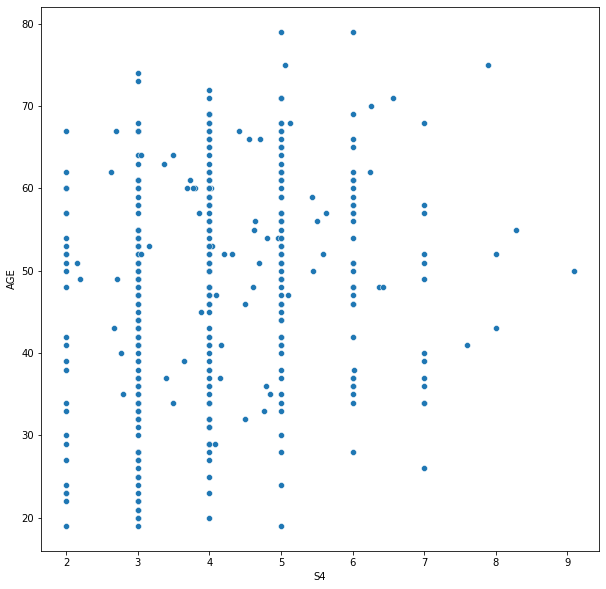

In [75]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='S4', y='AGE', data=data)

По диаграмме можно наблюдать количество единиц ТТГ в зависимости от возраста пациента

Посмотрим насколько на эту зависимость влияет половой признак.

<AxesSubplot:xlabel='S4', ylabel='AGE'>

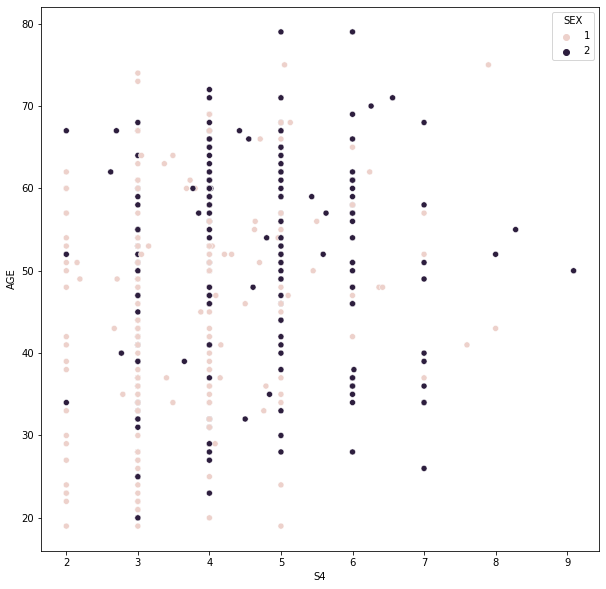

In [79]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='S4', y='AGE', data=data, hue='SEX')

Из диаграммы видно, что у женщин чаще ТТГ чаще 1-2 ед., а у мужчин в возрасте 40-70 лет 4-7 ед.

### Гистограмма

/Users/kalashnikova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

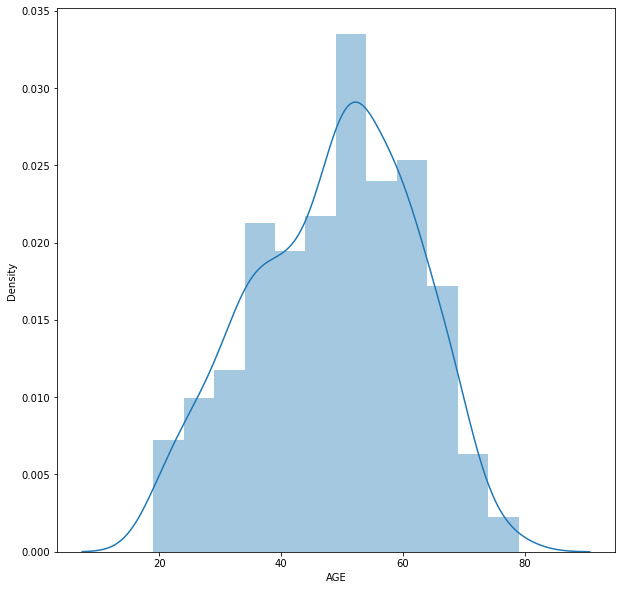

In [86]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['AGE'])

### Jointplot

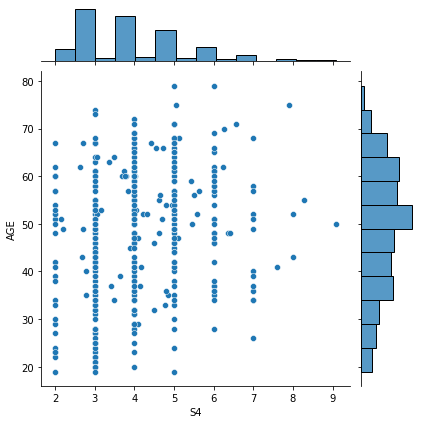

In [87]:
sns.jointplot(x='S4', y='AGE', data=data)

### Парные диаграммы

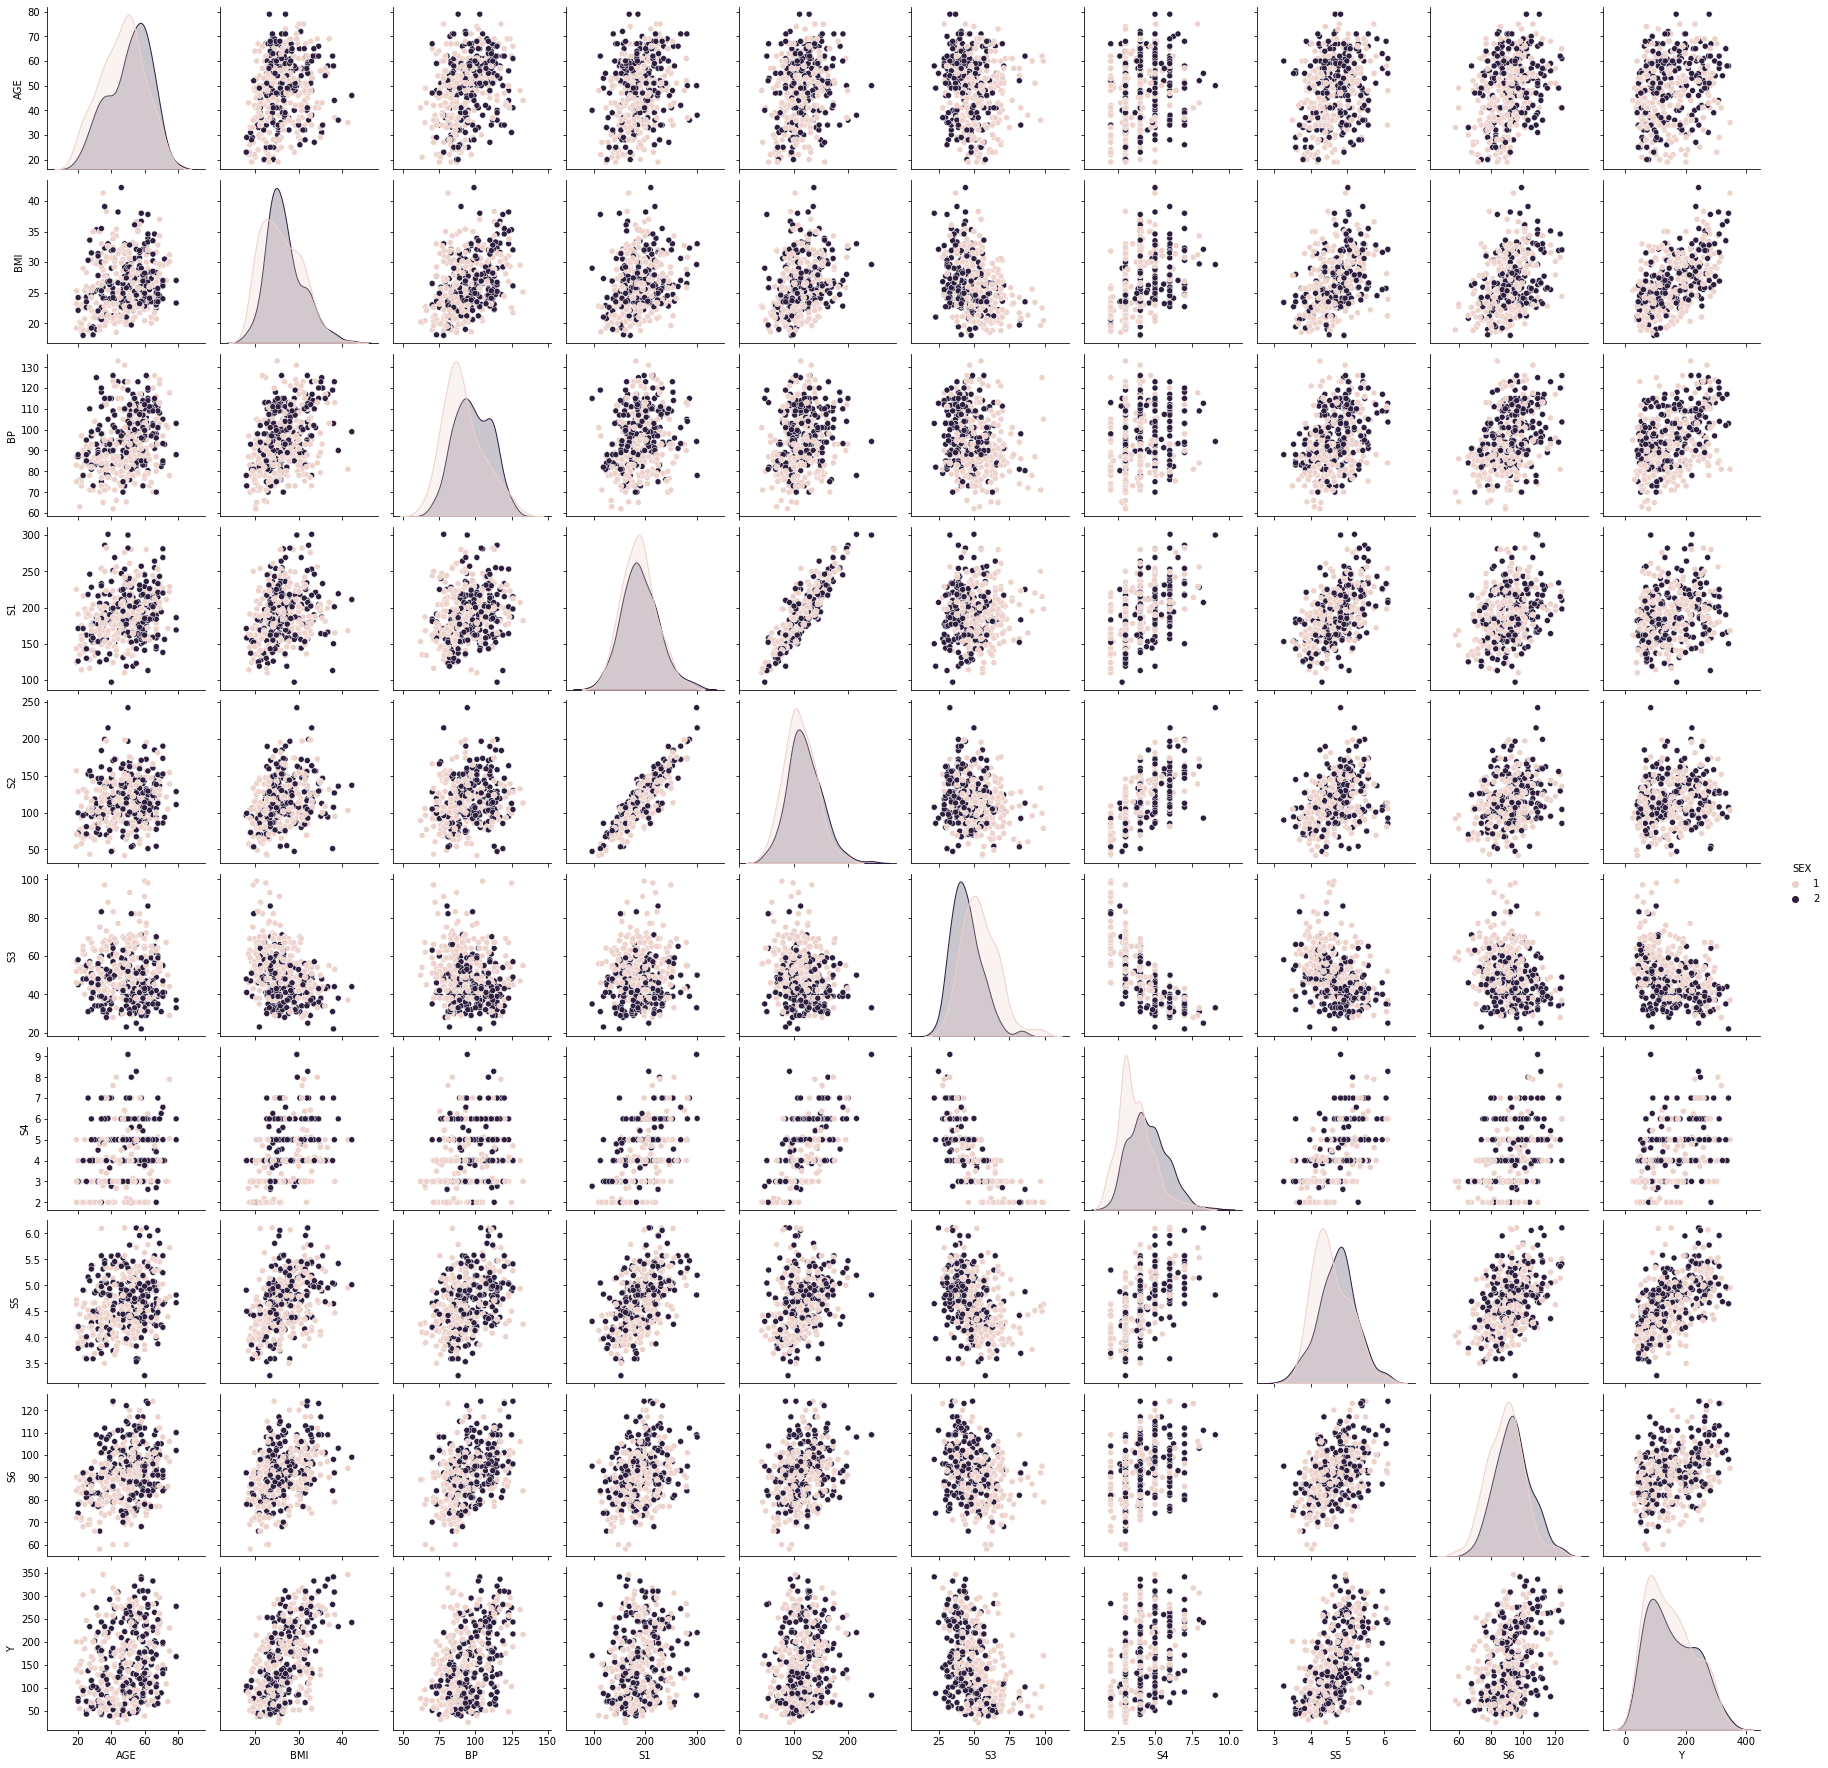

In [89]:
sns.pairplot(data, hue='SEX')

### Ящик с усами 
#### (одномерное распределение вероятности)

<AxesSubplot:xlabel='Y'>

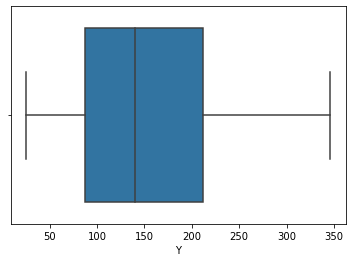

In [102]:
sns.boxplot(x=data['Y'])

### Violin plot
#### (По краям отображаются распределения плотности)

/Users/kalashnikova/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

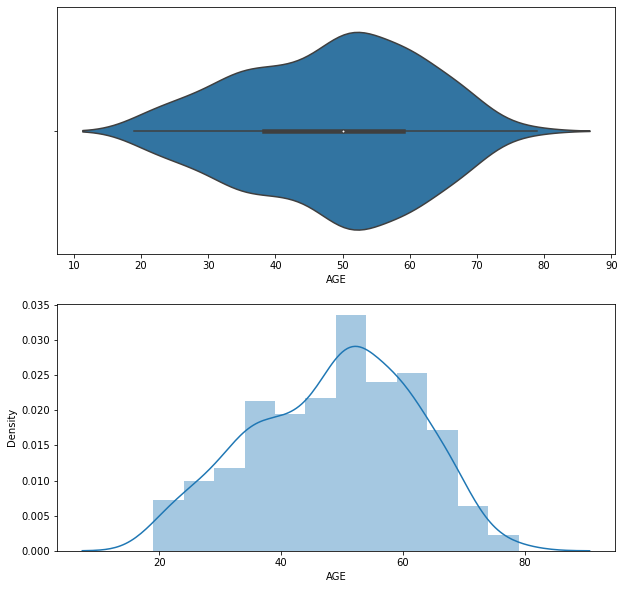

In [101]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['AGE'])
sns.distplot(data['AGE'], ax=ax[1])

<AxesSubplot:xlabel='SEX', ylabel='AGE'>

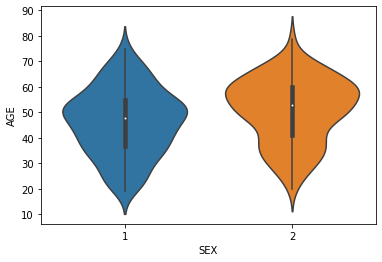

In [99]:
# Распределение возрастного параметра по половому признаку.
sns.violinplot(x='SEX', y='AGE', data=data)

## 4) Информация о корреляции признаков

### Корреляционная матрица

In [97]:
data.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


### Heatmap

<AxesSubplot:>

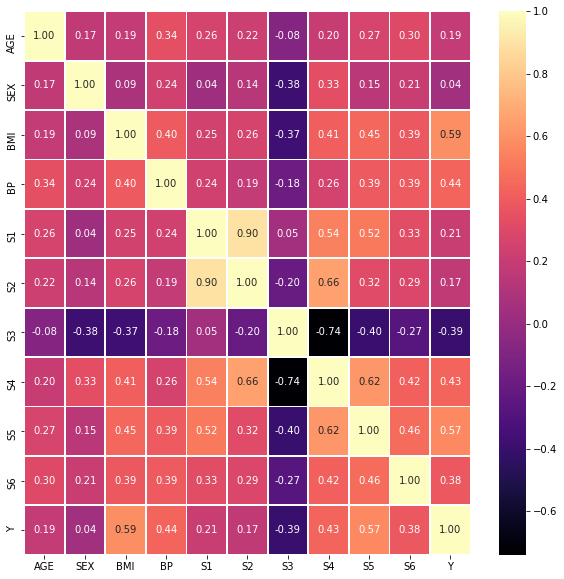

In [120]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot = True, cmap="magma", fmt='.2f', linewidths=.8)

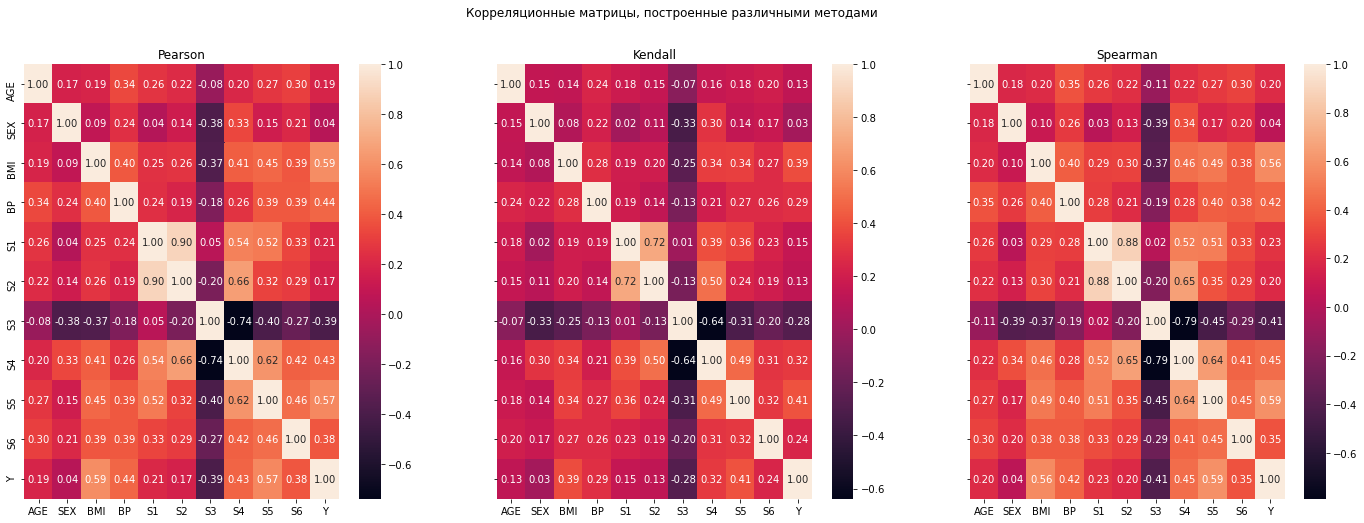

In [123]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(24,8))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')